#### We are going to code Decision Tree Classifier from scratch without using sickit learn

In [1]:
import pandas as pd
data = pd.read_csv("data.csv")

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.shape

(569, 33)

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop(labels = data.columns[-1],axis =1,inplace=True) 

In [7]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.drop(labels = 'id',axis =1,inplace=True) 

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data["diagnosis"] == 'M'

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

in boolean mask only true and false will be there. numbers will not be there
if we put boolean mask inside the square bracket of a data frame then we will get the output
where the whole rows get fetched where the condition is true

In [11]:
data[data["diagnosis"] == 'M']

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [12]:
training_data_len = int(0.7*data.shape[0])
testing_data_len = int(0.3* data.shape[0])

In [13]:
training_data_len

398

now we will divide 398 into two whic is 199 so we will take 199M and 199B in training data 
because we want very balanced data in our training data to make our model unbaise.

569 data values

70% =398 values, Training out of that 199 are b and 199 are m

30% = 171 values testing data

In [14]:
data['diagnosis'].replace(to_replace=["B","M"],value=[0,1],inplace=True)

#Here we are label encoding the two values in Diagnosis column to numbers, M =1 and B=0

In [15]:
malignant_class_data = data[data['diagnosis']==1]

In [16]:
benign_class_data = data[data['diagnosis']==0]

In [17]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
benign_class_training_data = benign_class_data.iloc[0:training_data_len//2]
benign_class_testing_data = benign_class_data.iloc[training_data_len//2:]
# training data divide by 2 is 398//2 is 199 till this 
# the tesing data starts from where the taining data ends and takes all the rest

In [19]:
malignant_class_training_data = malignant_class_data.iloc[0:training_data_len//2]
malignant_class_testing_data = malignant_class_data.iloc[training_data_len//2:]


In [20]:
malignant_class_testing_data.shape

(13, 31)

In [21]:
benign_class_testing_data.shape

(158, 31)

In [22]:
benign_class_training_data.shape

(199, 31)

In [23]:
malignant_class_training_data.shape

(199, 31)

now concat 199 m and 199 b into one so we can make a training data that is 50% mand 50%b
if we want to attach one table below other then axis =0
if we want to attach one table beside teh other then axis =1

In [24]:
training_data = pd.concat([benign_class_training_data,malignant_class_training_data],axis =0)

In [25]:
testing_data = pd.concat([benign_class_testing_data,malignant_class_testing_data],axis =0)

In [26]:
 training_data.shape

(398, 31)

In [27]:
testing_data .shape

(171, 31)

In [28]:
import numpy as np
benign_class_mean_vector = benign_class_training_data.iloc[:, 1:].mean()
# here we want all the rows and coloumn starting from 1 indexso before comma is row after is for column.
benign_class_cov = np.array(benign_class_training_data.iloc[:,1:].cov())

malignant_class_mean_vector = malignant_class_training_data.iloc[:, 1:].mean()
malignant_class_cov = np.array(malignant_class_training_data.iloc[:,1:].cov())

In [29]:
np.linalg.det(malignant_class_cov)

3.7699938540196604e-65

3.769993854018803e-65 is 0 for malignant which means if the determinant value we are getting is 0 then it is a singular matrix

In [30]:
np.linalg.det(benign_class_cov)
# finding the diterminant value linalg is used for linear algebra

1.3582567523044202e-76

1.358256752304227e-76 is 0 for benign which means if the determinant value we are getting is 0 then it is a singular matrix. 

**But why?** this happens  because we have so many columns in the dataset which are highly correlated to each other this why we are getting singular matrix.

so we will only take coloumns that are not correlate to each other

In [31]:
training_data.shape

(398, 31)

In [32]:
diagnosis_corr = data.corr()['diagnosis']
# We are checking how many columns are highly coreelated to the diagnosis column
diagnosis_corr

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [33]:
len(diagnosis_corr)

31

In [34]:
diagnosis_corr = diagnosis_corr[(diagnosis_corr  >= 0.5) |  (diagnosis_corr  <= -0.5) ]
#Here we are changing diagnosis_corr to contain only highly correlated columns
diagnosis_corr 

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [35]:
len(diagnosis_corr)

16

In [36]:
diagnosis_corr.index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [37]:
filtered_data = data[diagnosis_corr.index]
filtered_data

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [38]:
filtered_data.shape

(569, 16)

In [39]:
corr_matrix = filtered_data.iloc[:,1:].corr()

In [40]:
corr_matrix

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
radius_mean,1.000000,0.997855,0.987357,0.506124,0.676764,0.822529,0.679090,0.674172,0.735864,0.969539,0.965137,0.941082,0.413463,0.526911,0.744214
perimeter_mean,0.997855,1.000000,0.986507,0.556936,0.716136,0.850977,0.691765,0.693135,0.744983,0.969476,0.970387,0.941550,0.455774,0.563879,0.771241
area_mean,0.987357,0.986507,1.000000,0.498502,0.685983,0.823269,0.732562,0.726628,0.800086,0.962746,0.959120,0.959213,0.390410,0.512606,0.722017
compactness_mean,0.506124,0.556936,0.498502,1.000000,0.883121,0.831135,0.497473,0.548905,0.455653,0.535315,0.590210,0.509604,0.865809,0.816275,0.815573
concavity_mean,0.676764,0.716136,0.685983,0.883121,1.000000,0.921391,0.631925,0.660391,0.617427,0.688236,0.729565,0.675987,0.754968,0.884103,0.861323
concave points_mean,0.822529,0.850977,0.823269,0.831135,0.921391,1.000000,0.698050,0.710650,0.690299,0.830318,0.855923,0.809630,0.667454,0.752399,0.910155
radius_se,0.679090,0.691765,0.732562,0.497473,0.631925,0.698050,1.000000,0.972794,0.951830,0.715065,0.719684,0.751548,0.287103,0.380585,0.531062
perimeter_se,0.674172,0.693135,0.726628,0.548905,0.660391,0.710650,0.972794,1.000000,0.937655,0.697201,0.721031,0.730713,0.341919,0.418899,0.554897
area_se,0.735864,0.744983,0.800086,0.455653,0.617427,0.690299,0.951830,0.937655,1.000000,0.757373,0.761213,0.811408,0.283257,0.385100,0.538166
radius_worst,0.969539,0.969476,0.962746,0.535315,0.688236,0.830318,0.715065,0.697201,0.757373,1.000000,0.993708,0.984015,0.475820,0.573975,0.787424


<Axes: >

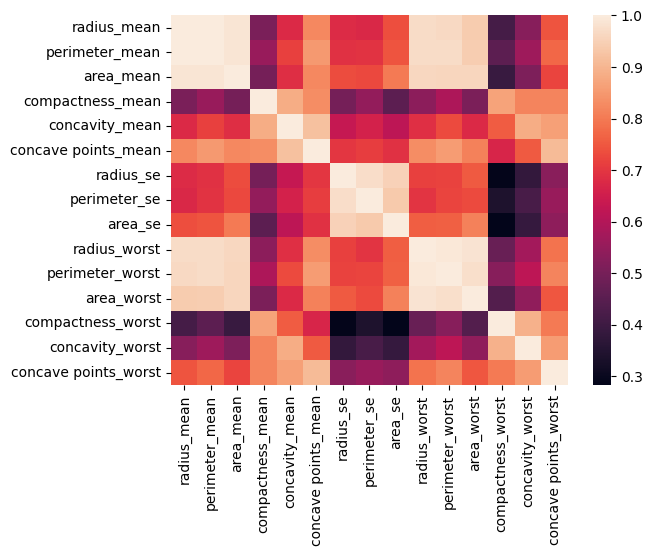

In [41]:
import seaborn as sns
sns.heatmap(corr_matrix,xticklabels=True,yticklabels=True)

**We look for the darkest blue blocks (most uncorrelated)**

In [42]:
low_correlated_features = list(corr_matrix.columns[7:10])

# Here we are putting it inside a list because we want to attach two more columns
# We use extends function for that which nly works with list 

In [43]:
low_correlated_features.extend(["compactness_worst","diagnosis"])

In [44]:
low_correlated_features

['perimeter_se', 'area_se', 'radius_worst', 'compactness_worst', 'diagnosis']

In [45]:
data = filtered_data[low_correlated_features]

In [46]:
data

,perimeter_se,area_se,radius_worst,compactness_worst,diagnosis
0,8.589,153.40,25.380,0.66560,1
1,3.398,74.08,24.990,0.18660,1
2,4.585,94.03,23.570,0.42450,1
3,3.445,27.23,14.910,0.86630,1
4,5.438,94.44,22.540,0.20500,1
...,...,...,...,...,...
564,7.673,158.70,25.450,0.21130,1
565,5.203,99.04,23.690,0.19220,1
566,3.425,48.55,18.980,0.30940,1
567,5.772,86.22,25.740,0.86810,1


**we will only take input features whose coorelation values between each other are in the range of -.2 and +0.2**

This is called feature selectioon. we are only chooosing only uncorrelated features of the dataset this is called feature selection. we reduce orginal features

Dimensionality Reduction, the number of coloumns of a dataset is called dimension and reducing the number of columns after performing PCA is called dimenstionality reduction.

we project our data into a diffrernt vector space get extra new columns that were not there orginally and then reduce those features that are not orginially there in the raw dataset to reduce the volume of area oppupied by the large number of fetures to reduce the complexities.

In [47]:
class Node():
    """
    A class representing a node in a decision tree.
    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        """
        Initializes a new instance of the Node class.

        Args:
            feature: The feature used for splitting at this node. Defaults to None.
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None.
            right: The right child node. Defaults to None.
            gain: The gain of the split. Defaults to None.
            value: If this node is a leaf node, this attribute represents the predicted value
                for the target variable. Defaults to None.
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

**class Node():** : This line defines the start of the Node class.
**
def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None**):: This is the constructor method of the Node class, which initializes a new instance of the node.

feature: Represents the feature used for splitting at this node. If this node is an internal node, it specifies the feature used for splitting. If it's a leaf node, it's set to None.

threshold: Represents the threshold value used for splitting at this node. Similar to feature, if the node is an internal node, it specifies the threshold value. If it's a leaf node, it's set to None.

left: Represents the left child node of the current node. This node contains instances where the feature's value is less than or equal to the threshold.

right: Represents the right child node of the current node. This node contains instances where the feature's value is greater than the threshold.

gain: Represents the gain achieved by splitting at this node. It's a measure of the information gain or impurity reduction due to the split.

value: Represents the predicted value for the target variable if this node is a leaf node. If the node is not a leaf node, this attribute is set to None.

The constructor initializes the attributes of the node based on the provided arguments, or it sets them to None if no arguments are provided. This structure allows for the creation of both internal and leaf nodes in a decision tree.

In [48]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=2, max_depth=2):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        # Create empty arrays to store the left and right datasets
        left_dataset = []
        right_dataset = []
        
        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            entropy (float): Entropy of the given label values.
        """
        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples) / len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)

        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            information_gain (float): Information gain of the split.
        """
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy 
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain 
        information_gain = parent_entropy - weighted_entropy
        return information_gain

    
    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain, 
              left and right datasets.
        """
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split

    
    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value
    
    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)
    
    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)  
        self.root = self.build_tree(dataset)

    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
    
    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None: 
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

## TRAIN - TEST SPLIT

In [49]:
X = data[['perimeter_se',"area_se","radius_worst","compactness_worst"]].values
Y = data[['diagnosis']].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=41, test_size=0.2)

In [51]:
#create model instance
model = DecisionTree(2, 2)

# Fit the decision tree model to the training data.
model.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data.
predictions = model.predict(X_test)


## TESTING THE MODEL

In [52]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score
accuracy = accuracy_score(Y_test, predictions)
print(f"Model's Accuracy: {accuracy}")

# Compute balanced accuracy
balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
print(f"Model's Balanced Accuracy: {balanced_accuracy}")

# Compute precision
precision = precision_score(Y_test, predictions, average='weighted')  # Using weighted averaging for multiclass
print(f"Model's Precision: {precision}")

Model's Accuracy: 0.956140350877193
Model's Balanced Accuracy: 0.9662162162162162
Model's Precision: 0.9610136452241715
